In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_qwen_3b.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_qwen2": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9      2371
1      1928
2      1728
3      1691
5      1331
4      1276
7       672
8       599
6       428
NaN       8
Name: count, dtype: int64

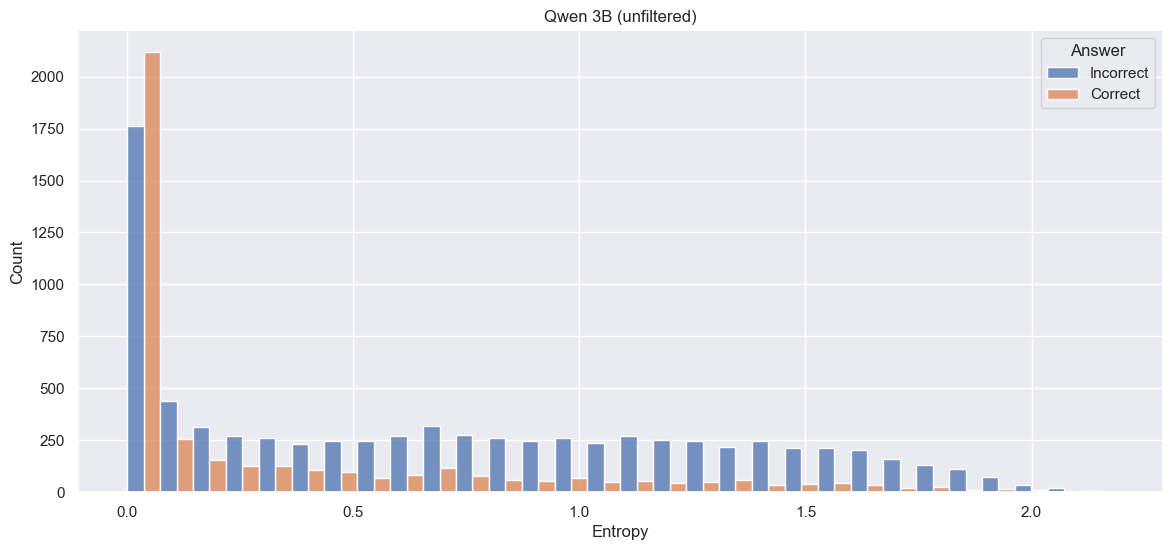

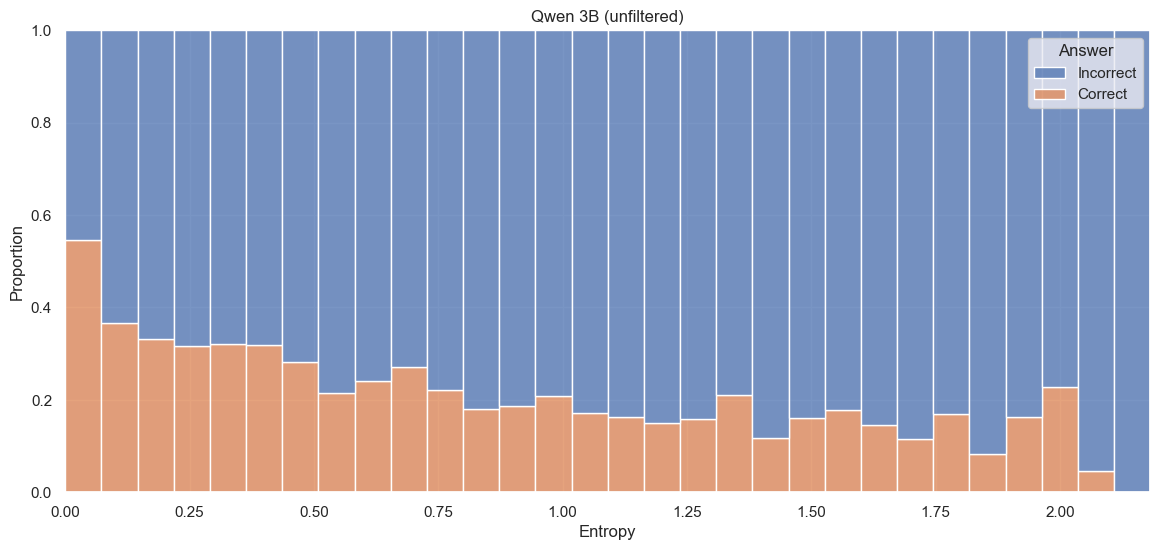

In [3]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(
    mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B (unfiltered)"
)

In [4]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_qwen2")
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    2371
1    1928
2    1728
3    1691
5    1331
4    1276
7     672
8     599
6     428
Name: count, dtype: int64

In [5]:
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    2371
1    1928
2    1728
3    1691
5    1331
4    1276
7     672
8     599
6     428
Name: count, dtype: int64

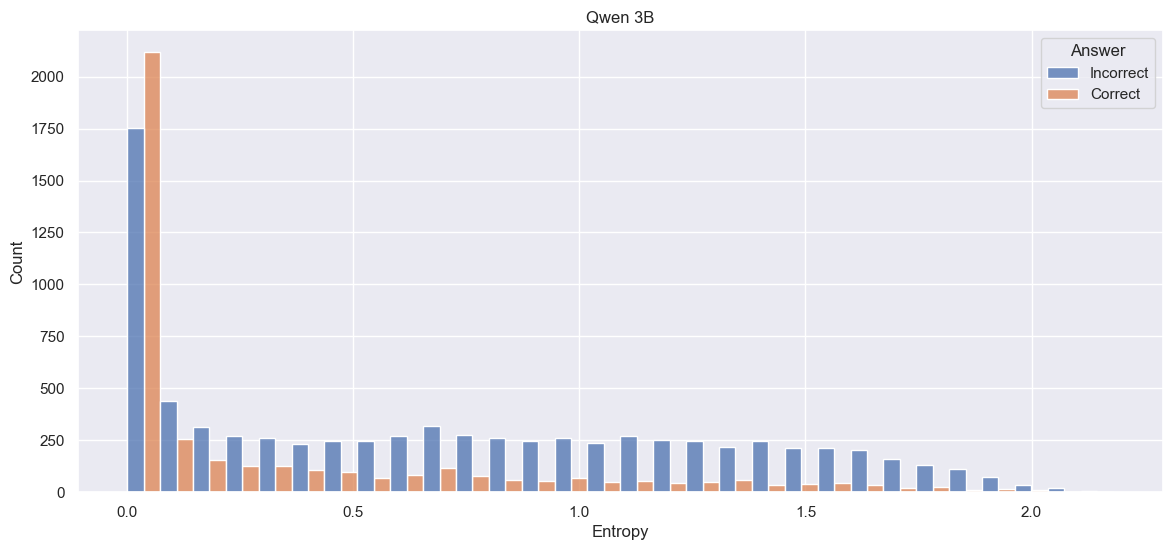

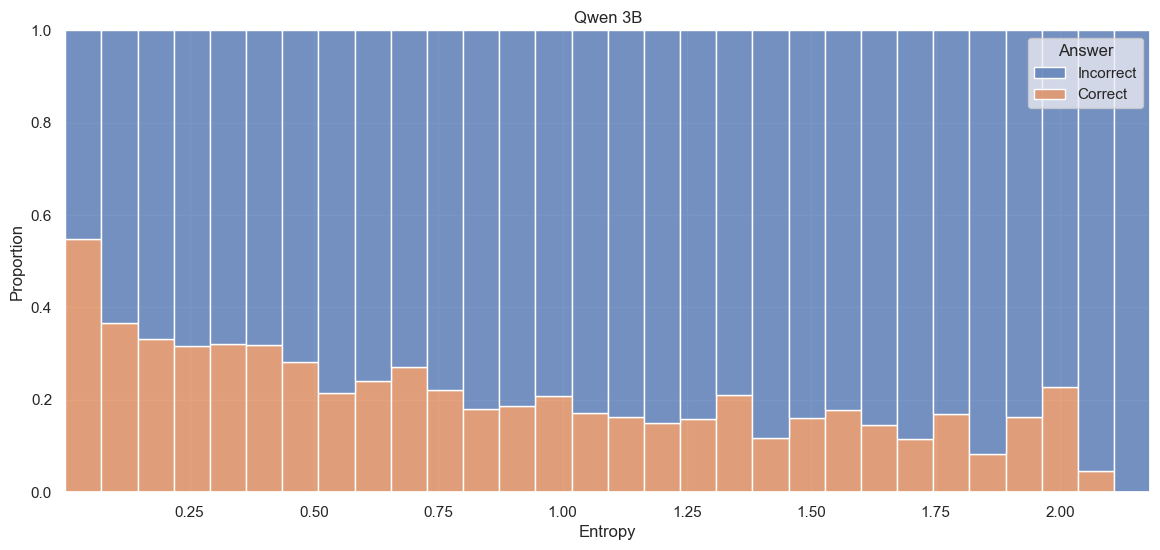

In [6]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B")

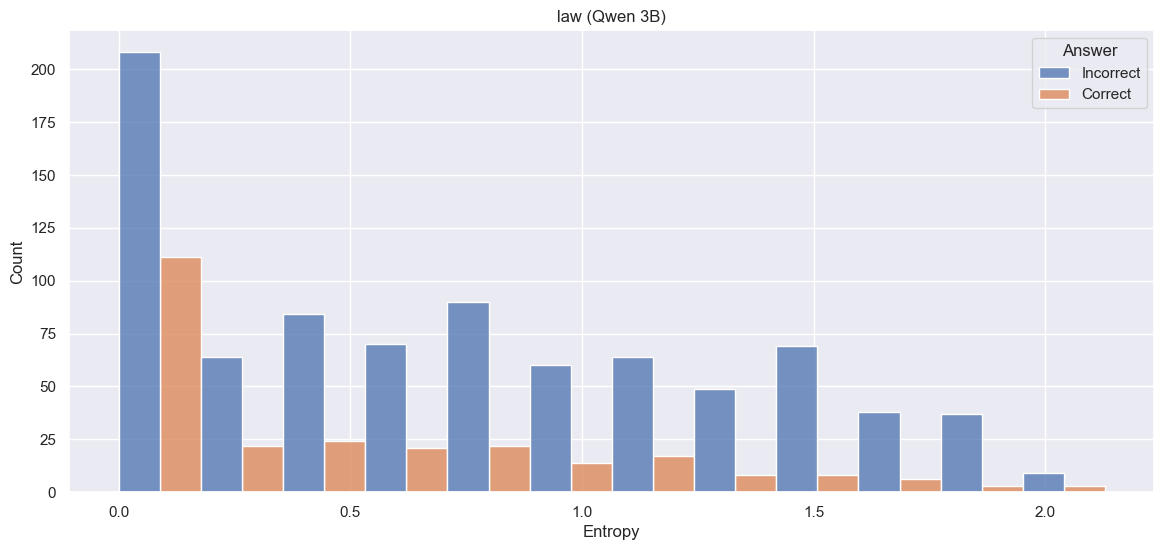

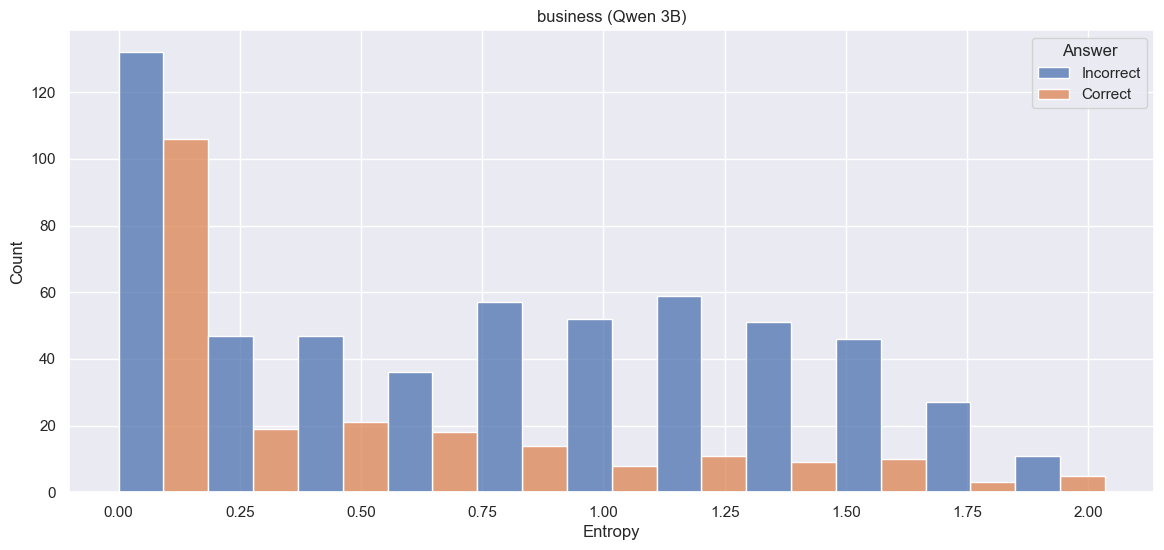

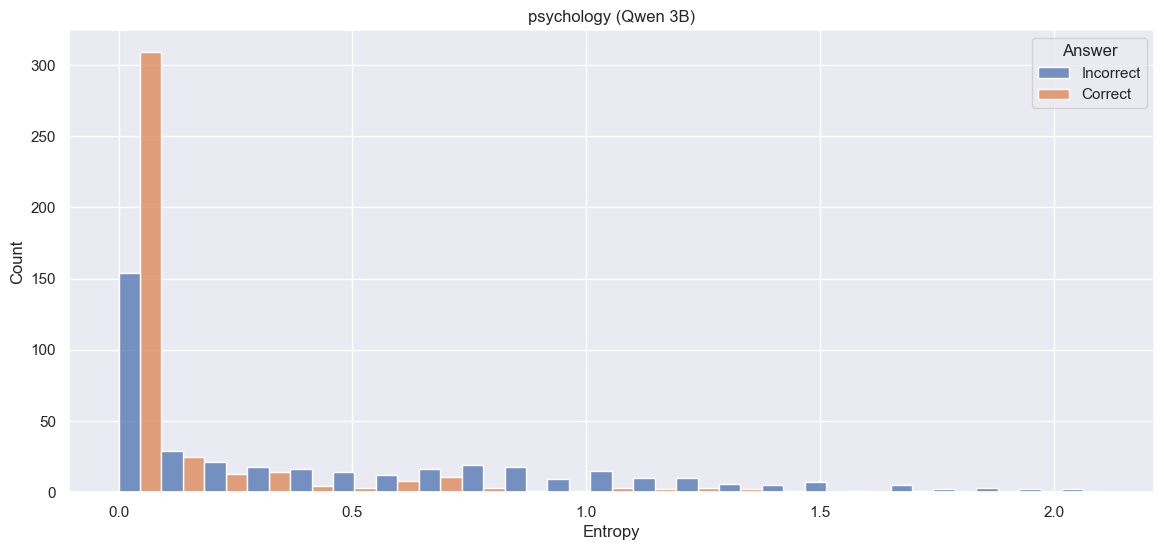

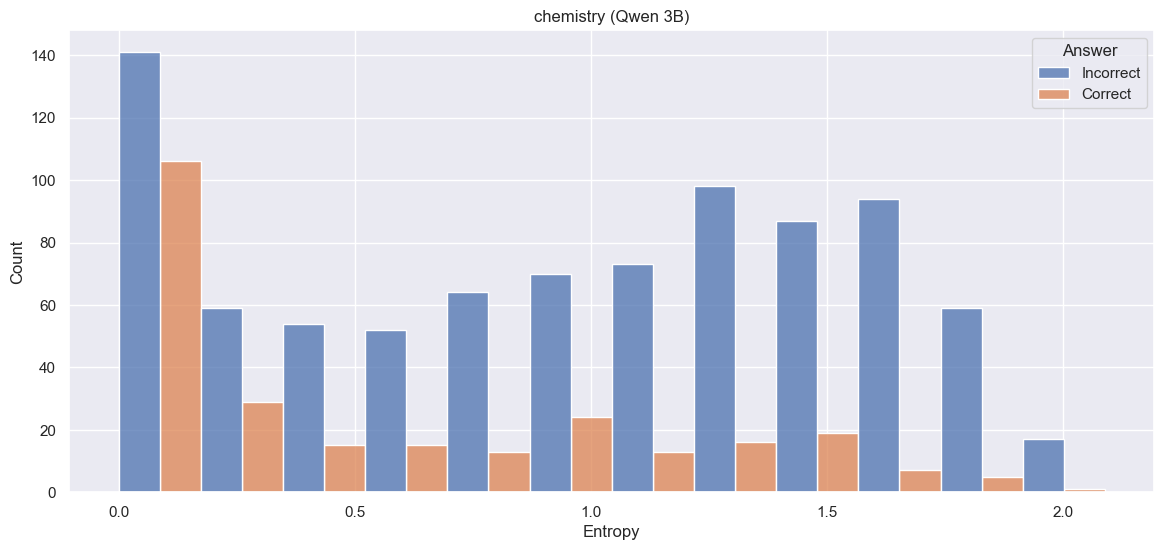

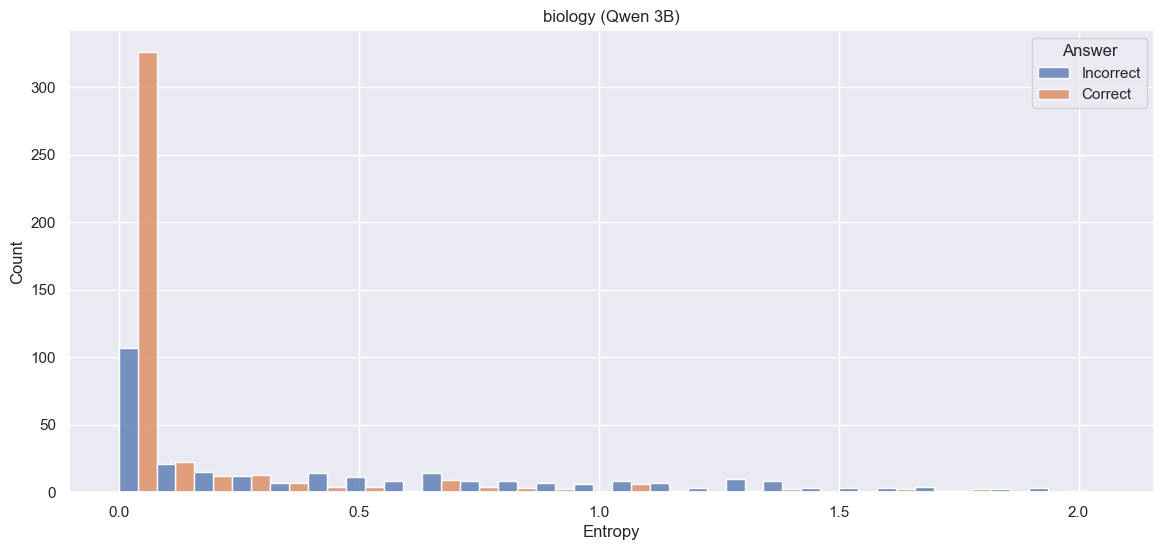

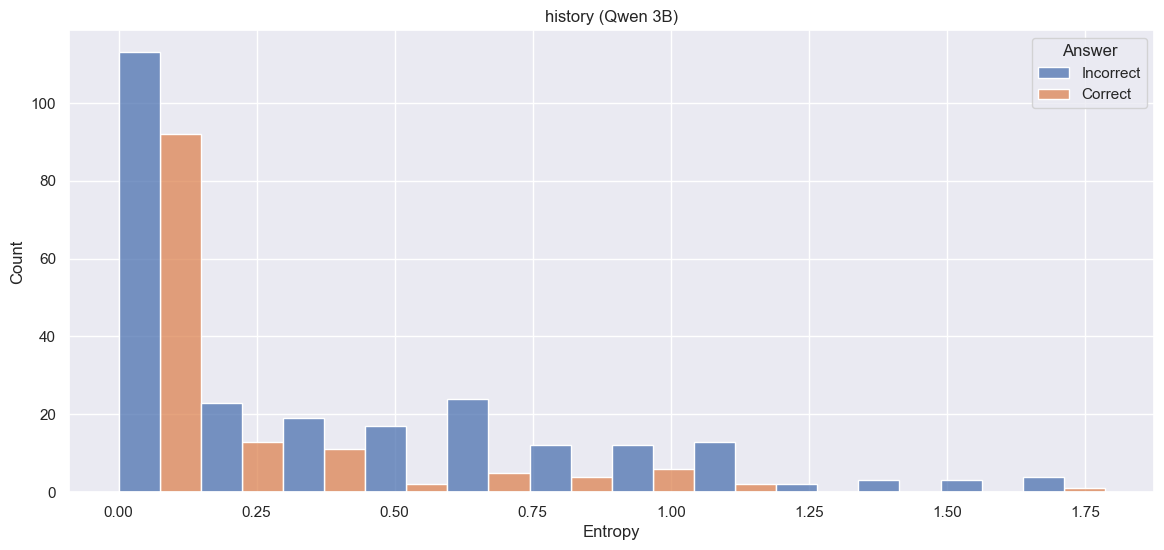

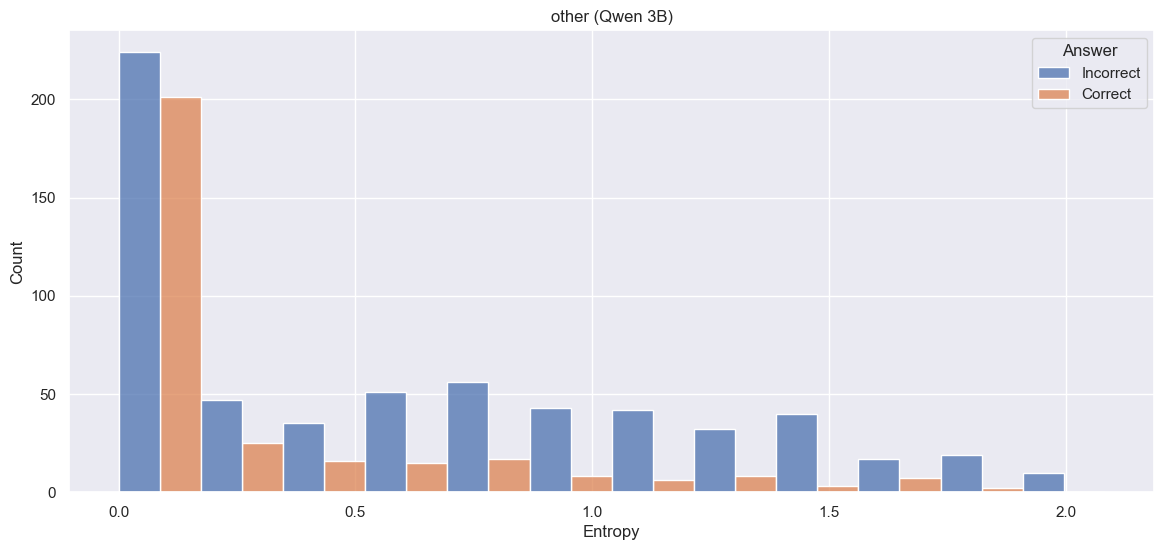

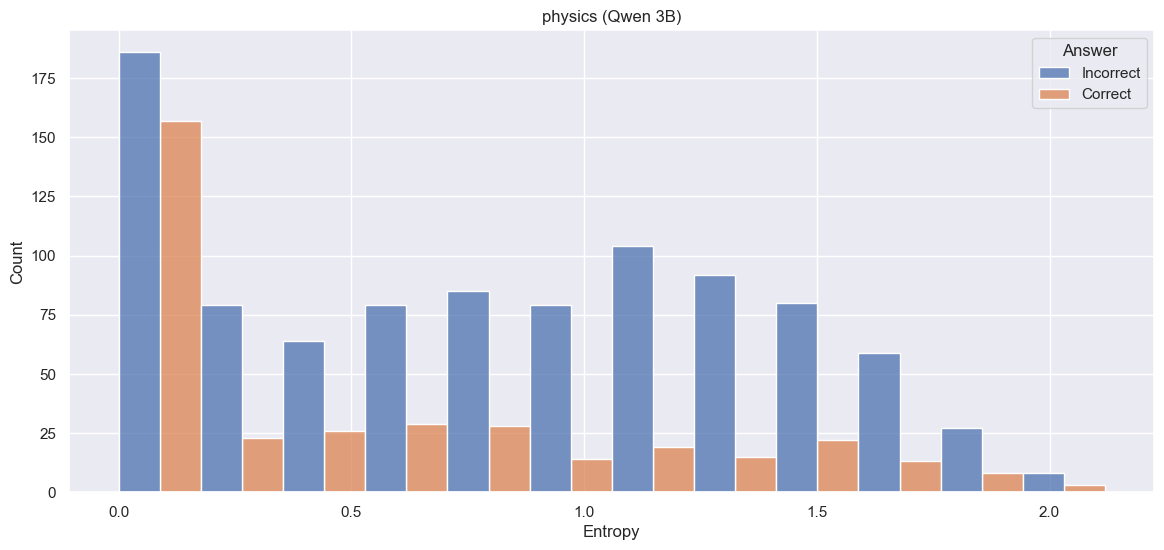

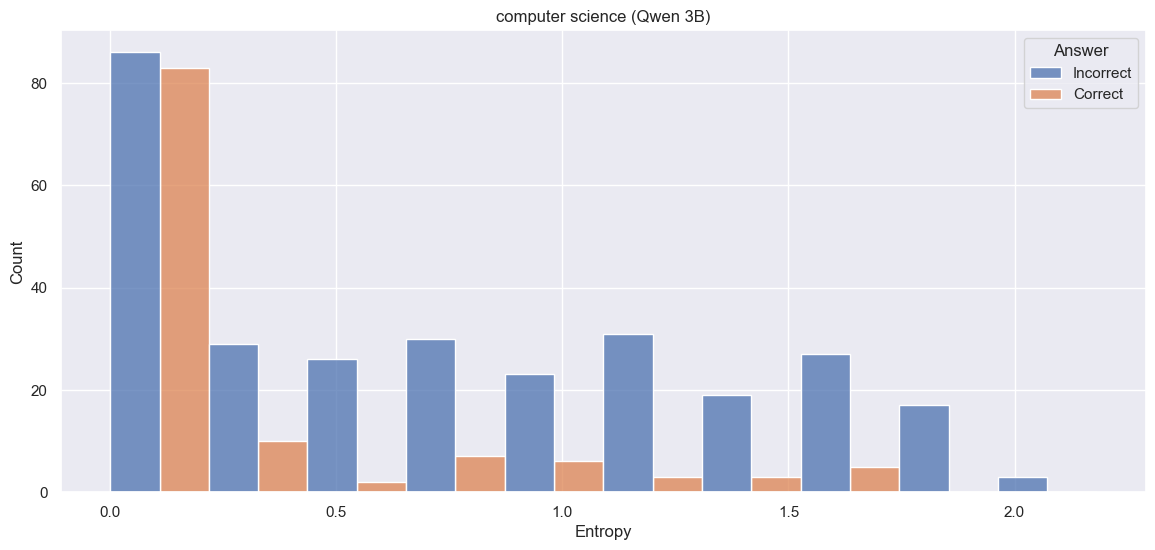

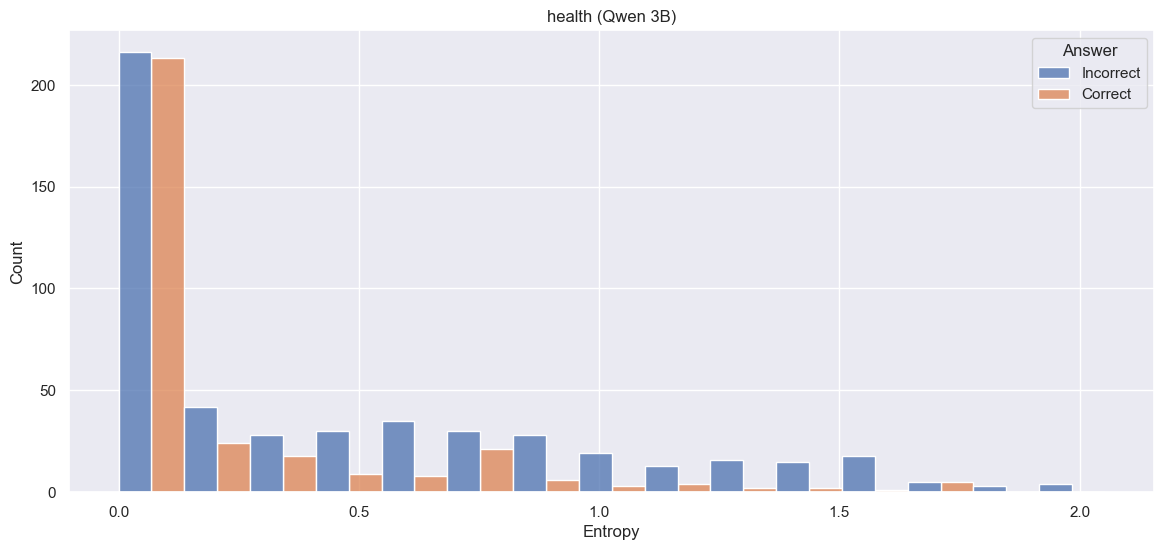

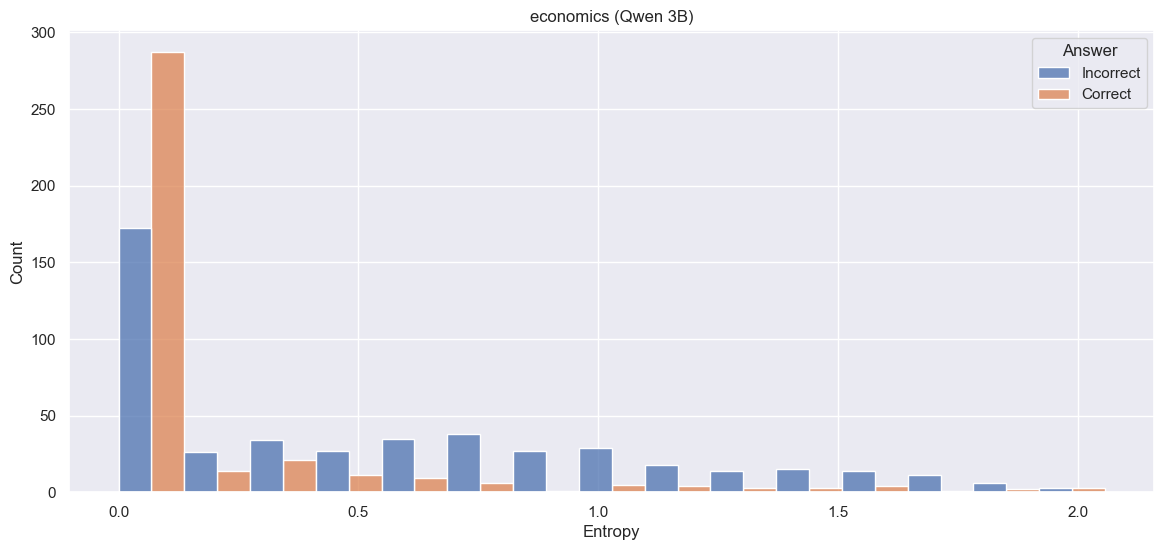

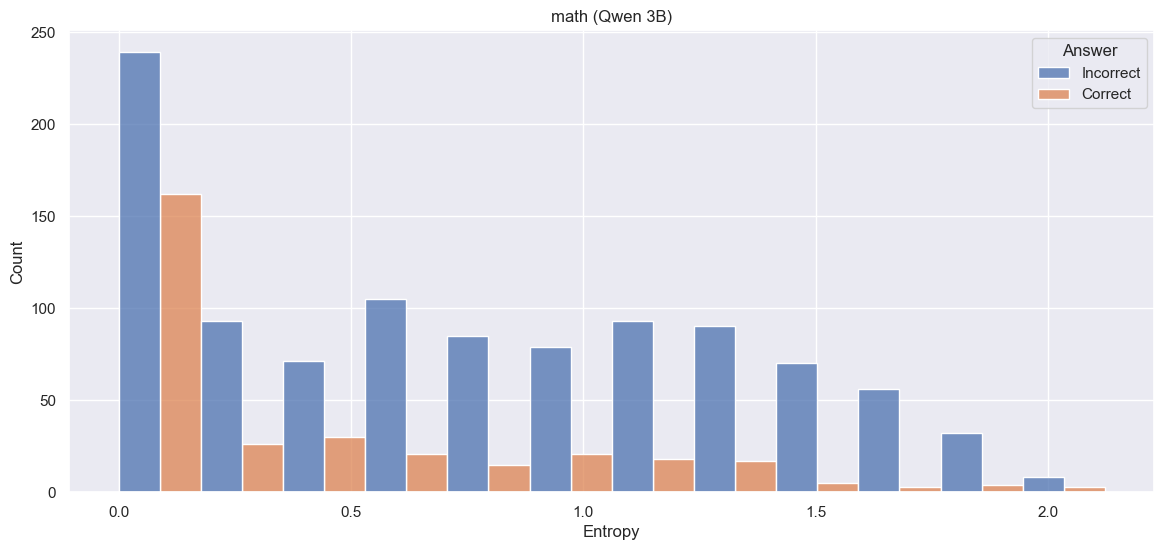

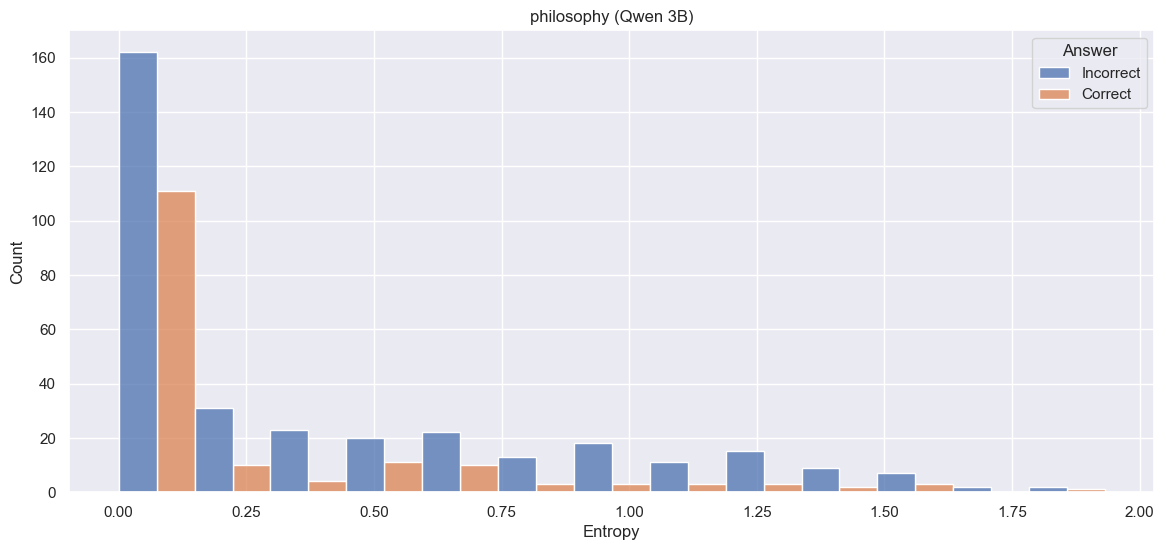

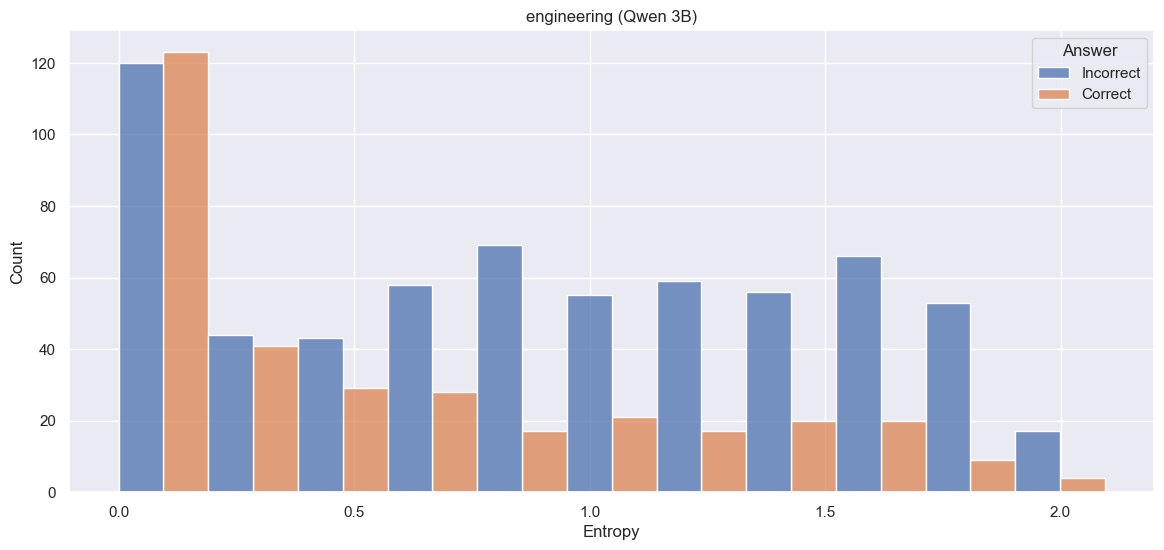

In [7]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df, "category", "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B"
)